In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
fuel_report = pd.read_csv('fuel_ferc1.csv')
print (fuel_report)
fuel_report.shape
fuel_report.info()

                     record_id  utility_id_ferc1  report_year  \
0        f1_fuel_1994_12_1_0_7                 1         1994   
1       f1_fuel_1994_12_1_0_10                 1         1994   
2        f1_fuel_1994_12_2_0_1                 2         1994   
3        f1_fuel_1994_12_2_0_7                 2         1994   
4       f1_fuel_1994_12_2_0_10                 2         1994   
...                        ...               ...          ...   
29518  f1_fuel_2018_12_12_0_13                12         2018   
29519   f1_fuel_2018_12_12_1_1                12         2018   
29520  f1_fuel_2018_12_12_1_10                12         2018   
29521  f1_fuel_2018_12_12_1_13                12         2018   
29522  f1_fuel_2018_12_12_1_14                12         2018   

           plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
0                  rockport                coal       ton        5377489.0   
1      rockport total plant                coal       ton      

In [10]:
print(fuel_report.head(8))

                record_id  utility_id_ferc1  report_year  \
0   f1_fuel_1994_12_1_0_7                 1         1994   
1  f1_fuel_1994_12_1_0_10                 1         1994   
2   f1_fuel_1994_12_2_0_1                 2         1994   
3   f1_fuel_1994_12_2_0_7                 2         1994   
4  f1_fuel_1994_12_2_0_10                 2         1994   
5  f1_fuel_1994_12_2_0_13                 2         1994   
6   f1_fuel_1994_12_2_1_1                 2         1994   
7  f1_fuel_1994_12_2_1_10                 2         1994   

       plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
0              rockport                coal       ton        5377489.0   
1  rockport total plant                coal       ton       10486945.0   
2                gorgas                coal       ton        2978683.0   
3                 barry                coal       ton        3739484.0   
4             chickasaw                 gas       mcf          40533.0   
5   e. c. gasto

In [8]:
fuel_report.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2011_12_42_0_8,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [14]:
print(fuel_report.tail())

                     record_id  utility_id_ferc1  report_year  \
29518  f1_fuel_2018_12_12_0_13                12         2018   
29519   f1_fuel_2018_12_12_1_1                12         2018   
29520  f1_fuel_2018_12_12_1_10                12         2018   
29521  f1_fuel_2018_12_12_1_13                12         2018   
29522  f1_fuel_2018_12_12_1_14                12         2018   

           plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
29518    neil simpson ct #1                 gas       mcf          18799.0   
29519  cheyenne prairie 58%                 gas       mcf         806730.0   
29520     lange ct facility                 gas       mcf         104554.0   
29521       wygen 3 bhp 52%                coal       ton         315945.0   
29522       wygen 3 bhp 52%                 gas       mcf          17853.0   

       fuel_mmbtu_per_unit  fuel_cost_per_unit_burned  \
29518                1.059                       4.78   
29519                1.050

In [21]:
fuel_report.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [19]:
fuel_report.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

In [20]:
print(fuel_report.columns)

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')


In [23]:
fuel_report[['fuel_unit']]  = fuel_report[['fuel_unit']].fillna(value= 'mcf')

In [24]:
fuel_report.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [29]:
fuel_report.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [43]:
fuel_report.groupby(['report_year', 'fuel_type_code_pudl']).sum()

utility_id_ferc1  fuel_qty_burned  \
report_year fuel_type_code_pudl                                      
1994        coal                            50430     7.172082e+08   
            gas                             54449     2.432212e+09   
            nuclear                          6643     2.069366e+08   
            oil                             14821     1.469716e+06   
            other                            1208     5.094458e+06   
...                                           ...              ...   
2018        coal                            28278     3.216100e+08   
            gas                             60737     3.476148e+09   
            nuclear                          2602     1.670945e+08   
            oil                             33226     5.975283e+06   
            waste                            2277     3.296373e+06   

                                 fuel_mmbtu_per_unit  \
report_year fuel_type_code_pudl                        
1994        coal                        10293.429297   
            gas                           498.035534   
            nuclear                      1384.184311   
            oil                           960.537684   
            other                           1.287506   
...                                              ...   
2018        coal                         4066.708564   
            gas                           466.933475   
            nuclear                       260.628340   
            oil                          1470.351399   
            waste                           8.693921   

                                 fuel_cost_per_unit_burned  \
report_year fuel_type_code_pudl                              
1994        coal                                 14984.572   
            gas                                  10792.496   
            nuclear                             227983.354   
            oil                                   9362.194   
            other                                  116.737   
...                                                    ...   
2018        coal                                  9488.197   
            gas                                   4322.494   
            nuclear                             173267.161   
            oil                                  33836.602   
            waste                                  660.972   

                                 fuel_cost_per_unit_delivered  \
report_year fuel_type_code_pudl                                 
1994        coal                                    59215.371   
            gas                                      8099.070   
            nuclear                                  3483.492   
            oil                                      7622.838   
            other                                     117.148   
...                                                       ...   
2018        coal                                   254052.695   
            gas                                      3851.904   
            nuclear                                  8278.485   
            oil                                    208107.905   
            waste                                     514.749   

                                 fuel_cost_per_mmbtu  
report_year fuel_type_code_pudl                       
1994        coal                           682.14697  
            gas                           1368.51941  
            nuclear                        136.53400  
            oil                           1147.21573  
            other                           27.97400  
...                                              ...  
2018        coal                           486.49567  
            gas                           1958.05754  
            nuclear                         14.28800  
            oil                           4105.16011  
            waste                          315.19300  

[148 rows x 6 columns]

In [55]:
fuel_report.groupby('fuel_type_code_pudl').sum().iloc[:,2:]

,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,
coal,1.626898e+10,177459.483188,576254.381,9.995814e+05,15275.11517
gas,5.562880e+10,11737.687844,156891.829,1.389252e+05,62126.34574
nuclear,4.462058e+09,14382.174064,4053318.428,2.340864e+07,1404.14500
oil,5.089737e+08,46887.135739,1361824.819,2.531352e+06,102402.57762
other,4.923388e+08,95.649646,3048.394,2.817538e+03,25899.18000
waste,5.168139e+07,150.452780,8607.492,8.120156e+03,362815.08200


In [68]:
report_year_1994 = fuel_report[(fuel_report['report_year']== 1994)]
print(report_year_1994.head(10))
report_year_1994.describe()

                record_id  utility_id_ferc1  report_year  \
0   f1_fuel_1994_12_1_0_7                 1         1994   
1  f1_fuel_1994_12_1_0_10                 1         1994   
2   f1_fuel_1994_12_2_0_1                 2         1994   
3   f1_fuel_1994_12_2_0_7                 2         1994   
4  f1_fuel_1994_12_2_0_10                 2         1994   
5  f1_fuel_1994_12_2_0_13                 2         1994   
6   f1_fuel_1994_12_2_1_1                 2         1994   
7  f1_fuel_1994_12_2_1_10                 2         1994   
8  f1_fuel_1994_12_2_2_10                 2         1994   
9   f1_fuel_1994_12_4_0_1                 4         1994   

       plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
0              rockport                coal       ton        5377489.0   
1  rockport total plant                coal       ton       10486945.0   
2                gorgas                coal       ton        2978683.0   
3                 barry                coal

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,1235.000000,1235.0,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000
mean,106.120648,1994.0,2.724018e+06,10.638098,213.191996,63.636060,3.086977
std,61.637376,0.0,8.204347e+06,13.708367,2639.254133,1288.748659,13.120614
min,1.000000,1994.0,2.000000e+00,0.000006,-57.490000,-58.800000,-3.003000
25%,49.000000,1994.0,2.890950e+04,1.021000,2.667000,2.326000,1.389170
50%,115.000000,1994.0,3.484640e+05,5.686920,20.290000,13.156000,1.972000
75%,161.000000,1994.0,1.423604e+06,21.062000,35.766500,30.910000,3.003500
max,208.000000,1994.0,8.937973e+07,124.860000,44009.190000,45115.000000,443.336000


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

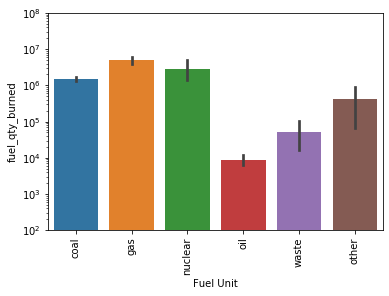

In [76]:
g = sns.barplot(data=report_year_1994, x='fuel_type_code_pudl', y='fuel_qty_burned')
g.set_yscale("log")
g.set_ylim(1e+02,1e+08)
plt.xlabel('Fuel Unit')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

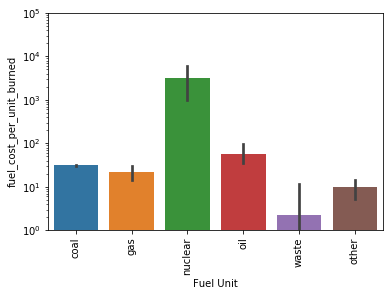

In [81]:
g = sns.barplot(data=report_year_1994, y='fuel_cost_per_unit_burned', x='fuel_type_code_pudl')
g.set_yscale("log")
g.set_ylim(1,1e+05)
plt.xlabel('Fuel Unit')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

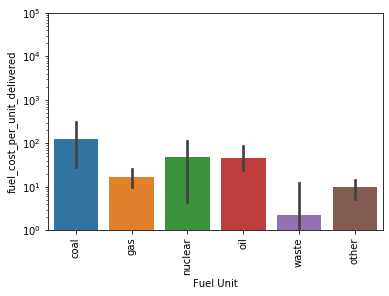

In [84]:
g = sns.barplot(data=report_year_1994, y='fuel_cost_per_unit_delivered', x='fuel_type_code_pudl')
g.set_yscale("log")
g.set_ylim(1,1e+05)
plt.xlabel('Fuel Unit')
plt.xticks(rotation=90)

In [100]:
coal= fuel_report.loc[fuel_report['fuel_type_code_pudl']== 'coal']
coal

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.59000,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.59200,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.13000,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.95000,47.210,45.990,1.970
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.92200,44.240,43.250,1.850
...,...,...,...,...,...,...,...,...,...,...,...
29503,f1_fuel_2018_12_191_1_14,191,2018,lawrence,coal,ton,1761218.0,17.88832,26.775,27.392,1.497
29510,f1_fuel_2018_12_403_0_2,403,2018,wygen 2,coal,ton,569800.0,16.11000,14.760,0.810,1.130
29516,f1_fuel_2018_12_12_0_8,12,2018,neil simpson unit 2,coal,ton,491913.0,16.10000,14.760,17.720,1.100
29517,f1_fuel_2018_12_12_0_10,12,2018,wyodak - bhp 20%,coal,ton,409637.0,16.06800,13.690,14.310,0.890


<Figure size 720x360 with 0 Axes>

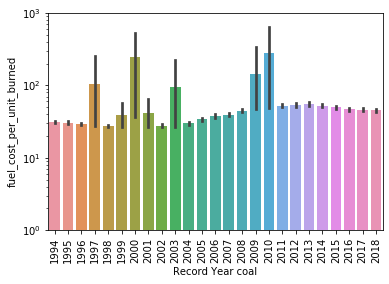

<Figure size 720x360 with 0 Axes>

In [114]:
g = sns.barplot(data=coal, y='fuel_cost_per_unit_burned', x='report_year')
g.set_yscale("log")
g.set_ylim(1,1e+3)
plt.xlabel('Record Year coal')
plt.xticks(rotation=90)
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

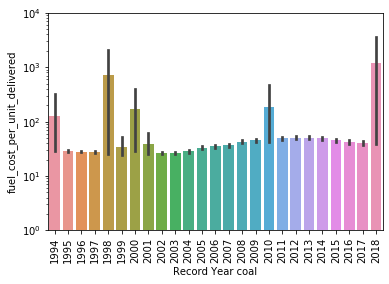

<Figure size 720x360 with 0 Axes>

In [118]:
g = sns.barplot(data=coal, y='fuel_cost_per_unit_delivered', x='report_year')
g.set_yscale("log")
g.set_ylim(1,1e+4)
plt.xlabel('Record Year coal')
plt.xticks(rotation=90)
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

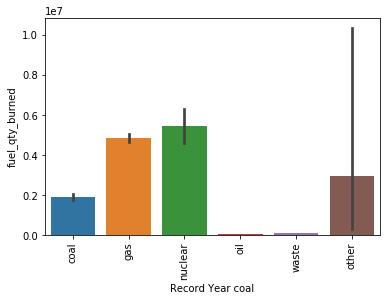

<Figure size 720x360 with 0 Axes>

In [121]:
sns.barplot(data=fuel_report, y='fuel_qty_burned', x='fuel_type_code_pudl')
plt.xlabel('Record Year coal')
plt.xticks(rotation=90)
plt.figure(figsize=(10,5))

In [122]:
A=[1,2,3,4,5,6]
B=[13,21,34]
q= A.extend(B)
print(q)

None
